# HW-7

### Xichen Li, EE521 - Group 5

#### A) Xichen Li: I did HW7 independently. 

#### Chapter-10 P3 :
Assume an electron is moving to the right from $𝑥 < 0$, and it is facing a potential trough witha depth of $−|𝑈_𝑜|$, That is, $𝑃𝐸 = −|𝑈_𝑜|$. <br>
(a) Show that there will be a reflection at the trough and calculate the reflection ($𝑅$) and transmission ($𝑇$) coefficients. <br>
(b) Plot the reflection and transmission probabilities in terms of $𝐾𝐸/|𝑈_𝑜|$, where $𝐾𝐸$ is the kinetic energy of the incident electron. <br>
Note that this problem is like the case of a potential barrier when $𝐾𝐸 > 𝑃𝐸$, discussed in this chapter. The only difference is that you can simply replace $𝑈_𝑜$ with $−|𝑈_𝑜|$ in the corresponding equations for $T$ and $R$.
![Ch10_P3.png](Ch10_P3.png)

#### Answer
(a) According to the definition of $R$ and $T$:
$$R=|\frac{B}{A}|^2$$
$$T=|\frac{F}{A}|^2$$
Since $KE>PE$, the boundary condition needs to be re-written as:
$$A+B=C+D$$
$$ik(A-B)=\alpha (C-D)$$
$$Ce^{\alpha L} + De^{-\alpha L} = Fe^{i\beta L}$$
$$\alpha(Ce^{\alpha L} - De^{-\alpha L})=i\beta Fe^{i\beta L}$$
where
$$k=\sqrt{\frac{2mE}{\hbar^2}}$$
$$\alpha=\sqrt{\frac{2m(-|U_o|-E)}{\hbar^2}}$$ 
$$\beta=\sqrt{\frac{2mE}{\hbar^2}}$$
Note $\alpha$ is an imaginary number. 

Then we can solve for $B/A$ and $F/A$:
And we also have :
$$\frac{B}{A}=\frac{(\alpha+i\beta)(\alpha-ik)e^{-\alpha L}-(\alpha-i\beta)(\alpha+ik)e^{\alpha L}}{(\alpha+i\beta)(\alpha+ik)e^{-\alpha L}-(\alpha-i\beta)(\alpha-ik)e^{\alpha L}}e^{-i\beta L}$$
$$\frac{F}{A}=\frac{-4i\alpha k}{(\alpha+i\beta)(\alpha+ik)e^{-\alpha L}-(\alpha-i\beta)(\alpha-ik)e^{\alpha L}}e^{-i\beta L}$$

Because $\beta=k$, then $B/A$ and $F/A$ can be re-written as :
$$\frac{B}{A}=\frac{(\alpha^2+k^2)(e^{-\alpha L}-e^{\alpha L})}{(\alpha+ik)^2e^{-\alpha L} - (\alpha-ik)^2e^{\alpha L}}e^{-ikL}$$
$$\frac{F}{A}=\frac{-4i\alpha k}{(\alpha+ik)^2e^{-\alpha L} - (\alpha-ik)^2e^{\alpha L}}e^{-ikL}$$


Then $T$ and $R$ coefficients are:
$$R=|\frac{B}{A}|^2=|\frac{(\alpha^2+k^2)(e^{-\alpha L}-e^{\alpha L})}{(\alpha+ik)^2e^{-\alpha L} - (\alpha-ik)^2e^{\alpha L}}e^{-ikL}|^2$$
$$T=|\frac{F}{A}|^2=|\frac{-4i\alpha k}{(\alpha+ik)^2e^{-\alpha L} - (\alpha-ik)^2e^{\alpha L}}e^{-ikL}|^2$$
As you can see from the expressions for $R$ and $T$, there will still be reflection at the trough. 

(b)Plot the reflection and transmission probabilities in terms of $𝐸/|𝑈_𝑜|$ <br>
The $R$ and $T$ are plotted in Plot package in Python: 

Text(0, 0.5, 'T & R')

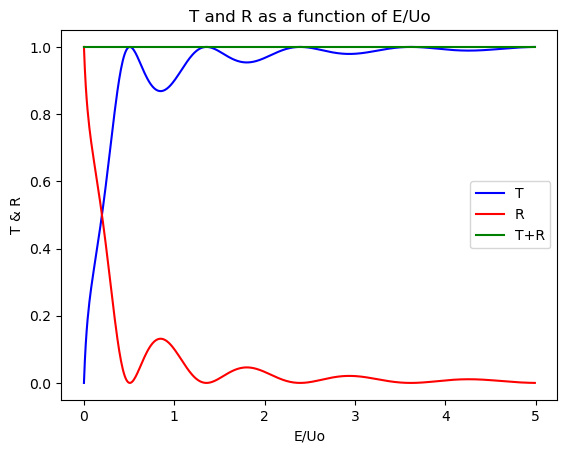

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
q = 1.6e-19
L=2e-9
m = 9.11e-31   #Assuming the particle mass is equal to a free electron

Uo=q
N=100
E1=5*q
dE=1e-2*q
E=np.arange(0,E1,dE)
k=np.sqrt(2*m*E/(eta**2))
alpha=np.sqrt(2*m*(-Uo-E)/(eta**2)+0j)

#print(k)
#print(a)

#print(np.exp(1j*np.pi))

t=-4j*alpha*k/((alpha+k*1j)**2*np.exp(-alpha*L)-(alpha-k*1j)**2*np.exp(alpha*L))*np.exp(-1j*k*L)
T=abs(t)**2
r=(alpha**2+k**2)*(np.exp(-alpha*L)-np.exp(alpha*L))/((alpha+k*1j)**2*np.exp(-alpha*L)-(alpha-k*1j)**2*np.exp(alpha*L))*np.exp(-1j*k*L)
R=abs(r)**2

plt.figure()
plt.plot(E/Uo, T, color='b', ls='-')
plt.plot(E/Uo, R, color='r', ls='-')
plt.plot(E/Uo, T+R, color='g', ls='-')
plt.legend(['T', 'R','T+R'])
plt.title('T and R as a function of E/Uo')
plt.xlabel('E/Uo')
plt.ylabel('T & R')

#### Chapter-10 P9 :
Calculate the transmission probability of a triangular barrier as shown in the figure below for energies between $10𝑚𝑒𝑉$ and $1 𝑒𝑉$. The values of the parameters are $𝑏 = 5 𝑛𝑚$, $𝑈_1 = 800 𝑚𝑒𝑉$ and $𝑈_2 = 200 𝑚𝑒𝑉$. <br>
(You may want to break this down into many rectangular barriers with varying width and heights.)
![Ch10_P9.png](Ch10_P9.png)

#### Answer
According to the 10.7 in the textbook, the scattering matrix $M$ of a transmission through a system consisting of multiple barriers can be broken into small piece of barriers:
$$M=M_1M_2...M_n$$ where $M_n$ can be written as:
$$M_n=\frac{1}{2ik}\begin{pmatrix} ik+\alpha & ik-\alpha \\ ik-\alpha & ik+\alpha \end{pmatrix}\frac{1}{2\alpha}\begin{pmatrix} (\alpha+i\beta)e^{-\alpha L_n} & (\alpha-i\beta)e^{-\alpha L_n} \\ (\alpha-i\beta)e^{+\alpha L_n} & (\alpha+i\beta)e^{+\alpha L_n} \end{pmatrix}$$ where $k$, $\alpha$, and $\beta$ is related to the shape of the rectangular barrier at any specific location $x$:
$$k=\sqrt{\frac{2mE}{\hbar^2}}$$
$$\alpha=\sqrt{\frac{2m(qU(x)-E)}{\hbar^2}}$$
$$\beta=\sqrt{\frac{2mE}{\hbar^2}}$$

The transmission probablity can be calculated from the cascaded matrix:
$$T=|\frac{1}{M_{11}}|^2$$ 
This problem will be solved in Python code below.

Text(0, 0.5, 'Probability')

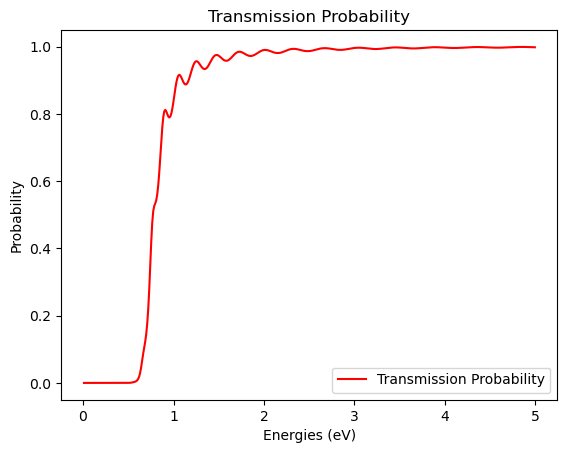

In [11]:
q=1.6e-19
b=5e-9
U1=0.8*q
U2=0.2*q
m=9.1e-31
eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s

Num=401;
Ux=np.linspace(U1,U2,Num)
#print(Ux)
Ln=b/(Num-1)

Ta=[]
Ra=[]
Ein=np.arange(10e-3*q,5*q,11.1e-3*q)
#Ein=[10e-3*q, 1000e-3*q]
#E=10e-3*q
for E in Ein:
    k=np.sqrt(2*m*E/(eta**2))
    alphax=np.sqrt(2*m*(Ux-E)/(eta**2)+0j)
    beta=k
    Cx=1/(2*1j*k)*1/(2*alphax)
    M=np.eye(2)
    for i in range(Num):
        A11=1j*k+alphax[i]
        A12=1j*k-alphax[i]
        A21=1j*k-alphax[i]
        A22=1j*k+alphax[i]
        A=np.array([[A11, A12], [A21, A22]])
        B11=(alphax[i]+1j*beta)*np.exp(-alphax[i]*Ln)
        B12=(alphax[i]-1j*beta)*np.exp(-alphax[i]*Ln)
        B21=(alphax[i]-1j*beta)*np.exp(alphax[i]*Ln)
        B22=(alphax[i]+1j*beta)*np.exp(alphax[i]*Ln)
        B=np.array([[B11, B12], [B21, B22]])    
        Mn=Cx[i]*A @ B
        M = M @ Mn
        T=abs(1/M[0,0])**2
        R=abs(M[1,0]/M[0,0])**2
    
    Ta=Ta+[T]
    Ra=Ra+[R]
    
#print(Ta)


plt.figure()
plt.plot(Ein/q, Ta, color='r', ls='-')
#plt.plot(Ein/q, Ra, color='b', ls='-')
plt.legend(['Transmission Probability', 'Reflection Probability'])
plt.title('Transmission Probability')
plt.xlabel('Energies (eV)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

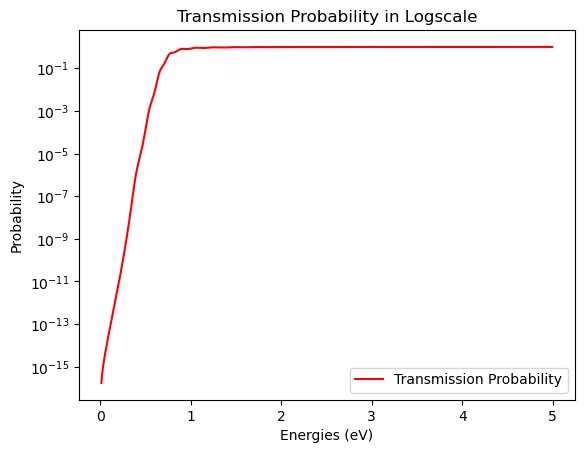

In [12]:
plt.figure()
plt.yscale("log")
plt.plot(Ein/q, Ta, color='r', ls='-')
#plt.plot(Ein/q, Ra, color='b', ls='-')
plt.legend(['Transmission Probability', 'Reflection Probability'])
plt.title('Transmission Probability in Logscale')
plt.xlabel('Energies (eV)')
plt.ylabel('Probability')

#### Chapter-11 P1 :
Derive expressions for energy levels and wave functions for a particle of effective mass $𝑀$ on an infinitesimally thin cylindrical shell (an example is an ultrathin aluminum foil rolled up as a cylinder) with radius $𝑅$ and length $𝐿$. The potential energy of the particle on the cylinder is a constant $𝑈_𝑜$. The potential energy outside the cylinder is infinity.

#### Answer:
Based on the description of the problem, we can rewrite the $H$ in a cylindrical coordinate: 
$$H=-\frac{\hbar^2}{2m_c}\frac{1}{R^2}\frac{d^2}{d\theta^2}-\frac{\hbar^2}{2m_c}\frac{d^2}{dz^2}+U(\theta,z)$$
where 
$$ U(\theta,z)=   \left\{
\begin{array}{ll}
      U_{o} & 0<z<L \\
      \infty & Otherwise
\end{array} 
\right.  $$


The wavefunction $\psi$ in $H\psi(\theta,z)=E\psi(\theta,z)$ can be expressed as $\psi(\theta,z)=\Theta(\theta)Z(z)$, where

$$-\frac{\hbar^2}{2m_c}\frac{d^2}{dz^2}=\epsilon_3Z(z)$$ with potential being zero for $0<z<L$ and $\infty$ outside. The $Z(z)$ can be solved as:
$$Z(z)=\sqrt{\frac{2}{L}}sin(\frac{n\pi}{L}z) \quad and \quad \epsilon_3=\frac{\hbar^2}{2m_c}(\frac{n\pi}{L})^2$$


The general solution for $\Theta(\theta)$ is:
$$\Theta(\theta)=e^{ik_1R\theta}$$
Since $\Theta(\theta)$ has a boundary condition $e^{ik_1\theta R}=e^{ik_1(\theta+2\pi) R}$. Then we will have
$$e^{ik_12\pi R}=1$$
$$k_1=\frac{2\pi}{2\pi R}l=\frac{l}{R} \quad l=0,\pm1,\pm2$$
Then $\psi$ is:
$$\psi(\theta,z)=e^{il\theta}\sqrt{\frac{2}{L}}sin(\frac{n\pi}{L}z),\quad l=0,\pm1,\pm2$$

The energy level in the conduction band is :
$$E=E_c+\frac{\hbar^2}{2m_c}(\frac{n\pi}{L})^2, \quad n=0,\pm1,\pm2$$  
Similarly, the energy level in the valence band is :
$$E=E_v-\frac{\hbar^2}{2m_v}(\frac{n\pi}{L})^2, \quad n=0,\pm1,\pm2$$  

#### Chapter-11 P3 :
You have a bulk semiconductor with a bandgap of $0.7 𝑒𝑉$. Assume that the effective mass of both electrons and holes is $9.1 × 10^{−31}𝑘𝑔$. Furthermore, this semiconductor is known to be a poor emitter of light both at 500 𝑛𝑚 and 8000 𝑛𝑚. How would you engineer this structure so that it emits light with a wavelength of (a) $500 nm$ and (b) $8000 nm$? Find the nanostructure
dimensions to achieve (a) and (b). Your design can be based on quantum wells, dots or nanowires.

#### Answer
(a) For $\lambda=500nm$, we can caculate a required bandgap energy from 
$$E=\hbar\omega=hf=\frac{hc}{\lambda}=\frac{6.626*10^{-34}*3*10^8}{500*10^{-9}}=3.9756*10^{-19}J=2.485eV$$
In a bulk semiconductor, at the bottom of the band, we have:
$$E_c-E_v=0.7eV$$
In aquantum dot structure, at the bottom of the band, we have 
$$E_{c,qd}-E_{v,qd}=0.7 + \frac{\hbar^2}{2}(\frac{1}{m_c}+\frac{1}{m_v})[(\frac{\pi}{L_1})^2+(\frac{\pi}{L_2})^2+(\frac{\pi}{L_3})^2]$$
In order to emit light with a wavelength of $500nm$, $L_1$, $L_2$, and $L_3$ in a quantom dot needs to satisfy:
$$\frac{\hbar^2}{2}(\frac{1}{m_c}+\frac{1}{m_v})[(\frac{\pi}{L_1})^2+(\frac{\pi}{L_2})^2+(\frac{\pi}{L_3})^2]=(2.485-0.7)eV$$

By solving the equation above, we can find $L_1=L_2=L_3\approx0.95nm$ can meet the requirement. 

(b) For $\lambda=8000nm$, we can caculate a required bandgap energy from 
$$E=\hbar\omega=hf=\frac{hc}{\lambda}=\frac{6.626*10^{-34}*3*10^8}{8000*10^{-9}}=2.485*10^{-20}J=0.155eV$$
In a bulk semiconductor, at the bottom of the band, we have:
$$E_c-E_v=0.7eV$$
The required bandgap energy is less than the energy in a bulk semiconductor. Thus, in this case, the energy difference between two conduction bands need to be used to emit light with a wavelength of 8000nm. I will still choose to use a quantum dot toachieve this. Assuming $L_1=L_2=L_3=L$, the energy difference between the $E_{1,1,1}$ and $E_{2,1,1}$ should be equal to $0.155eV$:
$$\frac{\hbar^2}{2}\frac{1}{m_c}(\frac{\pi}{L})^2=0.155eV$$

Then by solving the equation above, we can find $L_1=L_2=L_3\approx1.56nm$ can meet the requirement.